In [1]:
#!git clone https://github.com/MathBioCU/PyWSINDy_ODE
import numpy as np
import PyWSINDy_ODE.wsindy as ws
import PyWSINDy_ODE.ODE_examples as ODE_examples 
import matplotlib.pylab as plt
import SINDyFunctions as sf
from scipy.io import loadmat

In [ ]:
tol_ode = 1e-15                    # sol_ivp tolerance (abs and rel) for generating data                     
np.random.seed(42)                 #reproducibility 
use_preset_params = True           #Use parameters specified in gen_data

#ode params
ode_name = 'Lorenz'
ode_params = np.array([10, 8/3,28])
t_span = np.array([0.001, 10])
t_eval = np.linspace(0.001, 10, 10000)
x0 = np.array([-8 ,10 ,27]).T

# true coefficient marix
w_true = np.zeros((56,3))
w_true[2,0] = 10
w_true[3,0] = -10
w_true[2,1] = -1
w_true[3,1] = 28
w_true[7,1] = -1
w_true[1,2] = -2.66667
w_true[8,2] = 1

# get clean data
noise_ratio = 0.0  #set signal-to-noise ratio(L2 sense)
weights, t, xobs_clean, rhs = ODE_examples.simODE(x0, t_span, t_eval, tol_ode, ode_name, ode_params, noise_ratio)

# collect noisy simulation data
arr_sig_NR = np.hstack((np.logspace(-6,-2,5),np.linspace(0.05,1,15)))   # array of noise ratios
N_noise = 5
arr_xobs = np.zeros((xobs_clean.shape[0],xobs_clean.shape[1],len(arr_sig_NR),N_noise)) # allocte a 4-way array for storing noisy trajectory data
for i in range(0,len(arr_sig_NR)):
    noise_ratio = arr_sig_NR[i]
    for j in range(0,N_noise):
        weights, t, xobs, rhs = ODE_examples.simODE(x0, t_span, t_eval, tol_ode, ode_name, ode_params, noise_ratio)
        arr_xobs[:,:,i,j] = xobs

In [ ]:
# adaptive bump weak SINDy
arr_w_bumpWSINDy = np.zeros((w_true.shape[0],w_true.shape[1],len(arr_sig_NR),N_noise))
for i in range(0,len(arr_sig_NR)):
    for j in range(0,N_noise):
        xobs = arr_xobs[:,:,i,j]
        WSINDy_model = ws.wsindy(polys=np.arange(0, 6))
        WSINDy_model.getWsindyAdaptive(xobs, t, K = 400)
        w_ident = WSINDy_model.coef
        arr_w_bumpWSINDy[:,:,i,j] = w_ident
        print(f"Progress: {i*N_noise+(j+1)}/{len(arr_sig_NR)*N_noise}")

Progress: 1/400
Progress: 2/400
Progress: 3/400
Progress: 4/400
Progress: 5/400
Progress: 6/400
Progress: 7/400
Progress: 8/400
Progress: 9/400
Progress: 10/400
Progress: 11/400
Progress: 12/400
Progress: 13/400
Progress: 14/400
Progress: 15/400
Progress: 16/400
Progress: 17/400
Progress: 18/400
Progress: 19/400
Progress: 20/400
Progress: 21/400
Progress: 22/400
Progress: 23/400
Progress: 24/400
Progress: 25/400
Progress: 26/400
Progress: 27/400
Progress: 28/400
Progress: 29/400
Progress: 30/400
Progress: 31/400
Progress: 32/400
Progress: 33/400
Progress: 34/400
Progress: 35/400
Progress: 36/400
Progress: 37/400
Progress: 38/400
Progress: 39/400
Progress: 40/400
Progress: 41/400
Progress: 42/400
Progress: 43/400
Progress: 44/400
Progress: 45/400
Progress: 46/400
Progress: 47/400
Progress: 48/400
Progress: 49/400
Progress: 50/400
Progress: 51/400
Progress: 52/400
Progress: 53/400
Progress: 54/400
Progress: 55/400
Progress: 56/400
Progress: 57/400
Progress: 58/400
Progress: 59/400
Progre

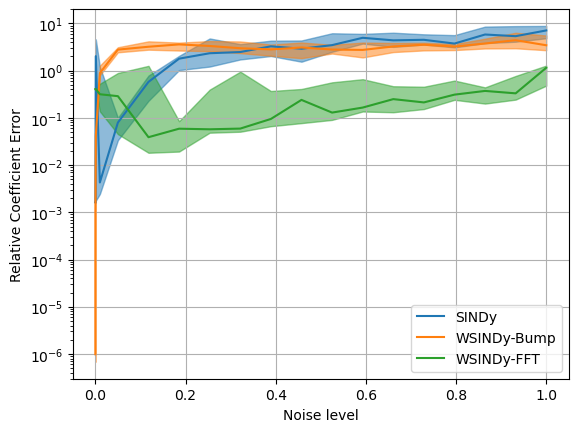

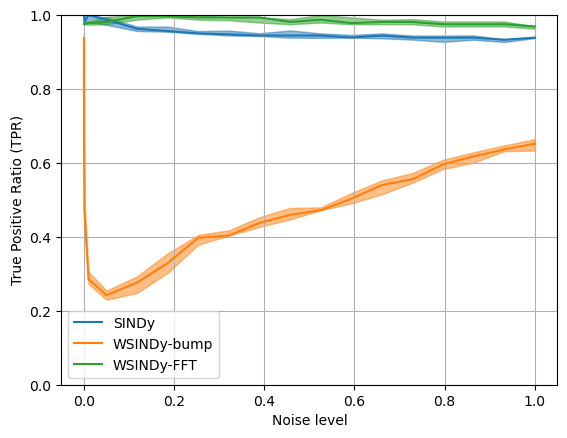

In [ ]:
data = dict()
data["w_true"] = w_true
data["arr_sig_NR"] = arr_sig_NR
data["arr_w_bumpWSINDy"] = arr_w_bumpWSINDy

data_FourierWSINDy = loadmat("Lorenz_poly5.mat")
data["arr_w_SINDy"] = data_FourierWSINDy["arr_w_SINDy"]
data["arr_w_FFTWSINDy"] = data_FourierWSINDy["arr_w_FFTWSINDy"]

np.allclose(w_true,data_FourierWSINDy["w_true"])

In [ ]:
sf.plotResult(data)